# Reading a file from the web with pandas

## Overview
- **Teaching:** 10 min
- **Exercises:** 5 min

**Questions**
* How can I read data from the web into pandas?

**Objectives**
* Use pandas to download and read in a CSV file for the web.


Increasingly data is being made openly available on the internet.  All research data that supports published work should where possible be published and the UK government has adopted an open data policy to increase transparency e.g centrally via https://data.gov.uk/ and the Office of National Statistics: https://www.ons.gov.uk/.

For this lesson we will focus on data related to COVID-19/Cornoavirus which are available at https://coronavirus.data.gov.uk/details/download. We have used this to generate a link to the [latest daily and cumulated recorded cases and deaths](https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumCasesBySpecimenDate&metric=cumDeaths28DaysByDeathDate&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv) in csv format.  You can explore the page to extract different data and generate your own link.  We will read this directly into pandas so that whenever we run our analysis we will always be working with the latest data.

First we will assign the url to a variable:

In [1]:
data_url='https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=cumCasesBySpecimenDate&metric=cumDeaths28DaysByDeathDate&metric=newCasesBySpecimenDate&metric=newDeaths28DaysByDeathDate&format=csv'

Because this link will generate a csv file, we can then read we can use the pandas function `read_csv()` just as before, to read the file and convert it to a `DataFrame`. 

In [2]:
import pandas as pd

covid_data=pd.read_csv(data_url)
covid_data

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
0,2020-11-25,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
1,2020-11-24,overview,K02000001,United Kingdom,1557006.0,56532.0,926.0,140.0
2,2020-11-23,overview,K02000001,United Kingdom,1556080.0,56392.0,13790.0,301.0
3,2020-11-22,overview,K02000001,United Kingdom,1542290.0,56091.0,11274.0,376.0
4,2020-11-21,overview,K02000001,United Kingdom,1531016.0,55715.0,12250.0,338.0
...,...,...,...,...,...,...,...,...
323,2020-01-07,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
324,2020-01-06,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
325,2020-01-05,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
326,2020-01-04,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN


We can see that by default it's done a good job of parsing the file, as the open data is designed to be as usable as possible.  In selecting a subset of this data it would be useful to treat the date as a `datetime` value rather than a string and possibly use this as the index of the dataset.  First let's first check what `datatype ` have been assigned to each of the columns:

In [3]:
dtypes = covid_data.dtypes
print(dtypes)
print(type(dtypes))

date                           object
areaType                       object
areaCode                       object
areaName                       object
cumCasesBySpecimenDate        float64
cumDeaths28DaysByDeathDate    float64
newCasesBySpecimenDate        float64
newDeaths28DaysByDeathDate    float64
dtype: object
<class 'pandas.core.series.Series'>


This tells is that the date is of type of `object` which is how pandas treats strings.  We can use an inbuilt pandas function to convert this one column to a `datetime` format and reassign it to the date `column`:

In [4]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
0,2020-11-25,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
1,2020-11-24,overview,K02000001,United Kingdom,1557006.0,56532.0,926.0,140.0
2,2020-11-23,overview,K02000001,United Kingdom,1556080.0,56392.0,13790.0,301.0
3,2020-11-22,overview,K02000001,United Kingdom,1542290.0,56091.0,11274.0,376.0
4,2020-11-21,overview,K02000001,United Kingdom,1531016.0,55715.0,12250.0,338.0
...,...,...,...,...,...,...,...,...
323,2020-01-07,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
324,2020-01-06,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
325,2020-01-05,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN
326,2020-01-04,overview,K02000001,United Kingdom,NaN,NaN,NaN,NaN


We don't see any difference in the output but can verify that the datatype has been converted by checking the types again:

In [5]:
dtypes = covid_data.dtypes
print(dtypes)
print(type(dtypes))

date                          datetime64[ns]
areaType                              object
areaCode                              object
areaName                              object
cumCasesBySpecimenDate               float64
cumDeaths28DaysByDeathDate           float64
newCasesBySpecimenDate               float64
newDeaths28DaysByDeathDate           float64
dtype: object
<class 'pandas.core.series.Series'>


Let's verify that we can select a range of dates.  We need to import the `datetime` library explicitly and assign start and end dates, for which we will choose 1st October 2020 and 1st November respectively.

In [6]:
import datetime
start_date=datetime.datetime(year=2020,month=10,day=1)
end_date=datetime.datetime(year=2020,month=11,day=1)

We can now use these to select a subset of the original dataframe for the month of October.  To do this we need to identify all data where the date is greater than or equal to the start date AND less than the end date.  As we saw in the first episode of the lesson we can do this by generating a boolean mask. First to select data after the start date

In [7]:
covid_data['date'] >= start_date

0       True
1       True
2       True
3       True
4       True
       ...  
323    False
324    False
325    False
326    False
327    False
Name: date, Length: 328, dtype: bool

second before the end date:

In [8]:
covid_data['date'] < end_date

0      False
1      False
2      False
3      False
4      False
       ...  
323     True
324     True
325     True
326     True
327     True
Name: date, Length: 328, dtype: bool

But we need both of these to be true so we combine them with the boolean and operator:

In [9]:
(covid_data['date'] >= start_date) & (covid_data['date'] < end_date)

0      False
1      False
2      False
3      False
4      False
       ...  
323    False
324    False
325    False
326    False
327    False
Name: date, Length: 328, dtype: bool

Now we can use this mask to select the data that we want to plot or analyse further:

In [10]:
covid_oct = covid_data[(covid_data['date'] >= start_date) & (covid_data['date'] < end_date) ]
covid_oct

,date,areaType,areaCode,areaName,cumCasesBySpecimenDate,cumDeaths28DaysByDeathDate,newCasesBySpecimenDate,newDeaths28DaysByDeathDate
25,2020-10-31,overview,K02000001,United Kingdom,1063101.0,47466.0,16511.0,319.0
26,2020-10-30,overview,K02000001,United Kingdom,1046590.0,47147.0,22694.0,338.0
27,2020-10-29,overview,K02000001,United Kingdom,1023896.0,46809.0,23336.0,310.0
28,2020-10-28,overview,K02000001,United Kingdom,1000560.0,46499.0,23626.0,281.0
29,2020-10-27,overview,K02000001,United Kingdom,976934.0,46218.0,24114.0,266.0
30,2020-10-26,overview,K02000001,United Kingdom,952820.0,45952.0,26550.0,276.0
31,2020-10-25,overview,K02000001,United Kingdom,926270.0,45676.0,15725.0,247.0
32,2020-10-24,overview,K02000001,United Kingdom,910545.0,45429.0,16242.0,211.0
33,2020-10-23,overview,K02000001,United Kingdom,894303.0,45218.0,21482.0,222.0
34,2020-10-22,overview,K02000001,United Kingdom,872821.0,44996.0,23266.0,234.0


Let's now plot the number of daily cases against the date:

Text(0, 0.5, 'Daily Cases')

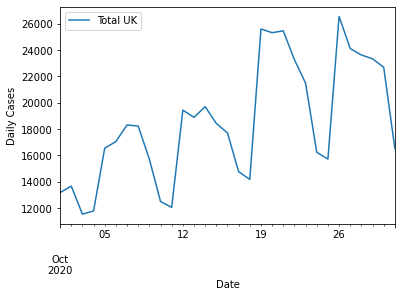

In [13]:
import matplotlib.pyplot as plt

covid_oct.plot(x='date', y='newCasesBySpecimenDate', label='Total UK')
plt.xlabel('Date')
plt.ylabel('Daily Cases')



# Exercise: Explore plots

1. Create plots of different periods and datasets to explore how to use pandas to plot data.
2. Can you create a plot of the ratio of COVID deaths to cases

## Key Points
* Pandas `read_csv()` function can also be used to read CSV files directly from the web.
* We can then manipulate and plot the data or subsets of it..